Reading red band
4481 11521
Reading near infra-red band
4481 11521


/opt/anaconda/anaconda3/envs/python34/lib/python3.4/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda/anaconda3/envs/python34/lib/python3.4/site-packages/ipykernel/__main__.py:40: RuntimeWarning: divide by zero encountered in log


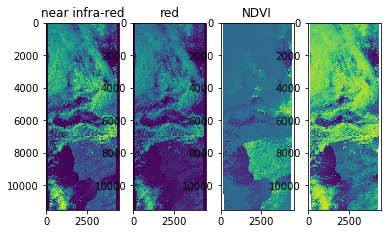

In [2]:
import snappy
import numpy as np
import matplotlib.pyplot as plt

file='/eodata/Envisat/Meris/FRS/2012/04/08/MER_FRS_1PPEPA20120408_105857_000005063113_00267_52867_0978.N1'
# file='/eodata/Sentinel-3/SRAL/SR_2_LAN/2017/08/10/S3A_SR_2_LAN____20170810T021859_20170810T022700_20170810T032119_0481_021_032______SVL_O_NR_002.SEN3/enhanced_measurement.nc'

# reader = snappy.ProductIO.getProductReader('Sen3')
# product = reader.readProductNodes(file, None)

# reader = snappy.ProductIO.getProductReaderForInput(file)
# print(reader)


product = snappy.ProductIO.readProduct(file)

print("Reading red band")
red = product.getBand('radiance_7')
w = red.getRasterWidth()
h = red.getRasterHeight()
print(w,h)
red_data = np.zeros(w * h, np.float32)
red.readPixels(0, 0, w, h, red_data)

red_data.shape = h, w


print("Reading near infra-red band")
nir = product.getBand('radiance_13')
w = red.getRasterWidth()
h = red.getRasterHeight()
print(w,h)
nir_data = np.zeros(w * h, np.float32)
nir.readPixels(0, 0, w, h, nir_data)
product.dispose()
nir_data.shape = h, w


ndvi=(nir_data-red_data)/(nir_data+red_data)
kontrast=np.log(red_data)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)

ax1.imshow(nir_data)
ax2.imshow(red_data)
ax3.imshow(ndvi)
ax4.imshow(kontrast)

ax1.set_title('near infra-red')
ax2.set_title('red')
ax3.set_title('NDVI')

plt.show()